In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Correct file path (inside Colab Notebooks folder)
file_path = "/content/drive/MyDrive/Colab Notebooks/SuperMarket.csv"

# Load dataset
df = pd.read_csv(file_path)

# Basic info
print("Dataset shape:", df.shape)
print(df.info())
print(df.head())

# Handle missing values
df = df.dropna()   # or df.fillna(method='ffill')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert data types
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
if 'Quantity' in df.columns:
    df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
if 'UnitPrice' in df.columns:
    df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Feature engineering
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df['Total'] = df['Quantity'] * df['UnitPrice']
if 'Date' in df.columns:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.day_name()

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale numerical features
num_cols = df.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Handle outliers using IQR on 'Total'
if 'Total' in df.columns:
    Q1 = df['Total'].quantile(0.25)
    Q3 = df['Total'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df['Total'] < (Q1 - 1.5*IQR)) | (df['Total'] > (Q3 + 1.5*IQR)))]

print("✅ Preprocessing complete. Clean dataset shape:", df.shape)
print(df.head())


Mounted at /content/drive
Dataset shape: (1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     10

Saving SuperMarket Analysis.csv to SuperMarket Analysis (2).csv
Dataset Shape: (1000, 17)
Columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

Preview:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       H

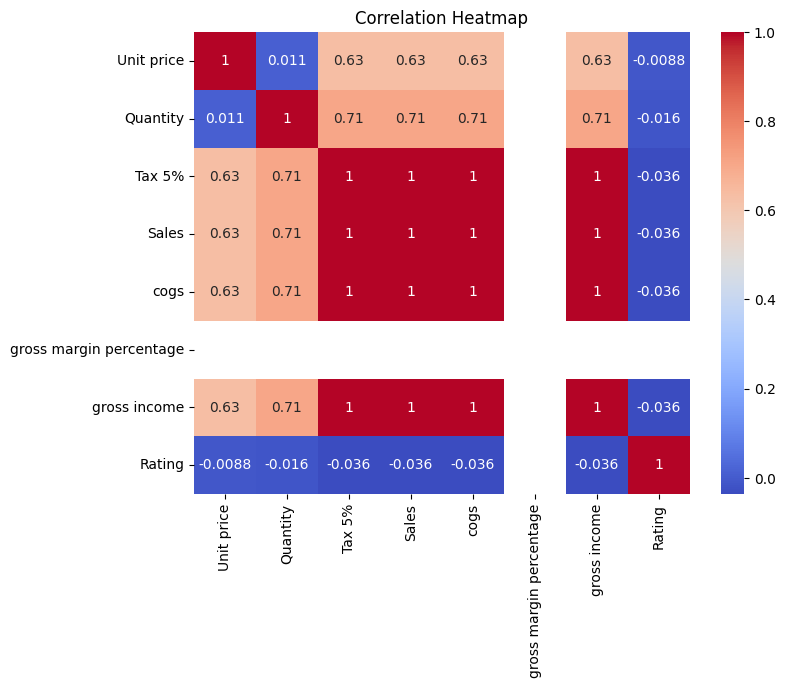


ANOVA Result (Sales by Gender):
F_onewayResult(statistic=np.float64(7.148527103165991), pvalue=np.float64(0.007625077102771033))

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     4038.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:27:57   Log-Likelihood:                -5819.1
No. Observations:                1000   AIC:                         1.164e+04
Df Residuals:                     997   BIC:                         1.166e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|

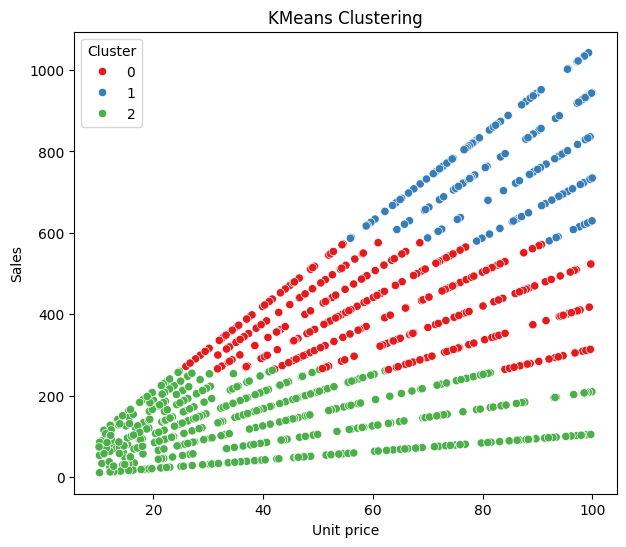

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans

# ==============================
# STEP 1: Load Dataset
# ==============================
from google.colab import files
uploaded = files.upload()

# Make sure file name matches exactly
file_name = "SuperMarket Analysis.csv"
df = pd.read_csv(file_name)

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nPreview:")
print(df.head())

# ==============================
# STEP 2: Basic Summary
# ==============================
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe(include='all'))

# ==============================
# STEP 3: Missing Values
# ==============================
print("\nMissing Values:")
print(df.isnull().sum())

# ==============================
# STEP 4: Correlation Analysis
# ==============================
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

# ==============================
# STEP 5: ANOVA Example (Sales by Gender)
# ==============================
if 'Gender' in df.columns and 'Sales' in df.columns:
    groups = [df['Sales'][df['Gender'] == g] for g in df['Gender'].unique()]
    anova_res = stats.f_oneway(*groups)
    print("\nANOVA Result (Sales by Gender):")
    print(anova_res)

# ==============================
# STEP 7: Regression Example
# ==============================
# Predict 'Sales' from 'Quantity' and 'Unit price'
if {'Sales','Quantity','Unit price'}.issubset(df.columns):
    model = smf.ols('Sales ~ Quantity + Q("Unit price")', data=df).fit()
    print("\nRegression Summary:")
    print(model.summary())

# ==============================
# STEP 8: Clustering Example
# ==============================
if {'Unit price','Quantity','Sales'}.issubset(df.columns):
    X = df[['Unit price','Quantity','Sales']]
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)

    plt.figure(figsize=(7,6))
    sns.scatterplot(data=df, x='Unit price', y='Sales', hue='Cluster', palette='Set1')
    plt.title("KMeans Clustering")
    plt.show()
